<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/2216155_AIML_Bootcamp_2023/blob/main/Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")

In [76]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [78]:
df.shape

(26, 7)

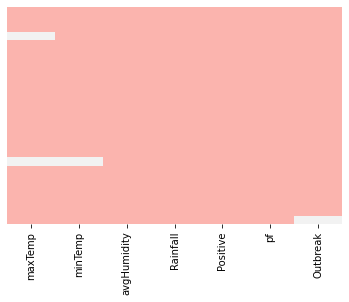

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [80]:
median_maxTemp=df['maxTemp'].median()
print(median_maxTemp)

33.5


In [81]:
median_minTemp=df['minTemp'].median()
print(median_minTemp)

24.0


In [82]:
df['maxTemp']=df['maxTemp'].fillna(median_maxTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

In [83]:
df.head(30)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,33.5,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [84]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak) #converting variables to numeric values
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,33.5,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [85]:
median_Outbreak=df['Outbreak'].median()
print(median_Outbreak)

0.0


In [86]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf  Outbreak
0      29.0     18.0        49.74      0.00      2156  112         0
1      34.0     23.0        83.27     15.22     10717  677         1
2      40.0     23.0        50.74      0.00      1257  127         0
3      33.5     24.0        84.57     11.15      9693  482         0
4      34.0     24.0        59.16      9.06      4198  211         0
5      34.0     27.0        73.23      0.00     11808  712         1
6      31.0     24.0        88.77     41.40     10881  648         1
7      33.0     24.0        77.94     23.88      8830  459         1
8      31.0     24.0        84.57     11.15      9693  482         0
9      36.0     24.0        53.40      2.12      9310  549         0
10     32.0     23.0        57.50      0.00     13154  838         1
11     34.0     18.0        59.40      0.00      2197  136         0
12     42.0     24.0        49.43      2.19      3362  213         0
13     45.0     32.0        34.74 

In [87]:
df=df.drop(['Positive',   'pf'],axis =1)


In [88]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,33.5,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


In [89]:
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values #2D array

In [ ]:
X

In [ ]:
Y

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
X_train

In [94]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [ ]:
X_train

In [96]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [97]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [98]:
y_pred=model.predict(X_test)

In [99]:
model.score(sst.transform(X),Y) 

0.7692307692307693

In [100]:
model.score(X_train,Y_train)

0.8

In [70]:
model.score(X_train,Y_train)

0.8

In [101]:
model.score(X_test,Y_test)

0.6666666666666666